In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../Linear Regression/DATA/mushrooms.csv')
df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [4]:
X = df.drop('class',axis=1)
X = pd.get_dummies(X , drop_first=True)
y = df['class']

In [5]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size=0.15 , random_state=101)

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier()
param_grid = {'learning_rate' : [0.01 , 0.05 , 0.2] , 'n_estimators' : [50 , 100] , 'max_depth' : [3,4,5]}
grid = GridSearchCV(grad , param_grid)
grid.fit(x_train , y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [8]:
grid.best_params_

{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100}

In [10]:
grid.best_estimator_

GradientBoostingClassifier(learning_rate=0.05, max_depth=4)

In [11]:
pred = grid.predict(x_test)
from sklearn.metrics import classification_report , accuracy_score

In [12]:
print(classification_report(pred , y_test))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



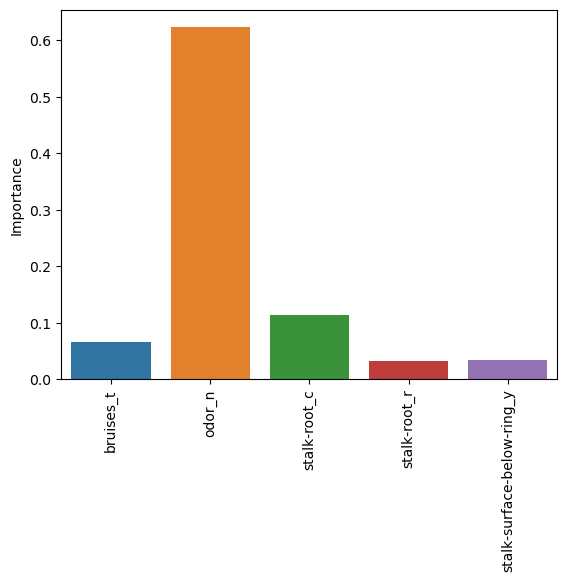

In [15]:
imp_features = pd.DataFrame(data = grid.best_estimator_.feature_importances_ , index=X.columns , columns=['Importance'])
imp_features = imp_features[imp_features['Importance']>0.03]
sns.barplot(data = imp_features , x=imp_features.index , y='Importance' )
plt.xticks(rotation=90);